In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

from envs import MatrixGameEnv, MatrixGameEnv_no_history

from players import TitForTatPlayer, TitForTatThenDefectPlayer

import evaluation

import pandas as pd


In [72]:
plt.plot(np.random.randn(10))
plt.show()

Figure(432x288)


In [73]:
import ray
from ray import tune
from ray.rllib.examples.env.multi_agent import MultiAgentCartPole
from ray.rllib.examples.models.shared_weights_model import \
    SharedWeightsModel1, SharedWeightsModel2, TF2SharedWeightsModel, \
    TorchSharedWeightsModel
from ray.rllib.models import ModelCatalog
# from ray.rllib.policy import PolicySpec
from ray.rllib.utils.framework import try_import_tf
from ray.rllib.utils.test_utils import check_learning_achieved
from ray.tune.registry import register_env

In [74]:
import ray
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.ppo import DEFAULT_CONFIG as DEFAULT_CONFIG_PPO

from ray.rllib.agents.dqn import DQNTrainer, DEFAULT_CONFIG 
from ray.rllib.agents.dqn import  DEFAULT_CONFIG as DEFAULT_CONFIG_DQN


from ray.tune.registry import register_env
from ray.tune.logger import pretty_print

ray.init(ignore_reinit_error=True, log_to_driver=False)

2021-08-16 20:31:33,784	INFO worker.py:810 -- Calling ray.init() again after it has already been called.


In [5]:
register_env('MG_t4td_env', lambda c: MatrixGameEnv(
    player2=TitForTatThenDefectPlayer(min_defect_turn=0, max_defect_turn=100)))

register_env('MG_t4t_env', lambda c: MatrixGameEnv(
    player2=TitForTatPlayer()))


In [6]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4td/'
cp_path = "/checkpoint_000100/checkpoint-100"


In [7]:
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [8]:
# run_dir = 'DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
run_dir = 'DQN_MG_t4t_env_3dc73_00001_1_gamma=0.99,lr=0.001,n_step=1_2021-08-13_15-33-36'

In [9]:
test_exp

'DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0.0001,n_step=1_2021-08-13_15-31-39'

In [10]:

path1 = base_dir+ exp_dir+test_exp
with open(path1 + '/params.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
agent = DQNTrainer(config=data)

2021-08-16 14:18:27,349	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-08-16 14:18:27,505	WARNING util.py:55 -- Install gputil for GPU system monitoring.


In [12]:
agent.restore(path1+ cp_path)

2021-08-16 14:18:27,594	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4td/DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0.0001,n_step=1_2021-08-13_15-31-39/checkpoint_000100/checkpoint-100
2021-08-16 14:18:27,595	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 6167.652756929398, '_episodes_total': 1000}


In [13]:
agent.compute_action(np.random.rand(400))

2021-08-16 14:18:27,600	WARNING deprecation.py:33 -- DeprecationWarning: `compute_action` has been deprecated. Use `compute_single_action` instead. This will raise an error in the future!


1

In [14]:
evaluation.is_t4t(agent, 10000)

((0.6904,), 0.3377)

In [15]:
evaluation.is_t4t(agent, 10000)

((0.6755,), 0.3339)

In [16]:
rand_agent = evaluation.test_random_agent(coop_frac=0.8)
t4t_agent = evaluation.test_t4t_agent()

In [17]:
evaluation.is_t4t(rand_agent, 10000)

((0.4966,), 0.8064)

In [44]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'
exp_dir = 'DQN_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [45]:

t4t_frac = []
coop_frac = []
for test_exp in exps:
    path1 = base_dir+ exp_dir+test_exp
# path1 = base_dir+ exp_dir+run_dir

# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t'
# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
    
    if os.path.exists(path1 + cp_path):
        with open(path1 + '/params.pkl', 'rb') as f:
            data = pickle.load(f)
        agent = DQNTrainer(config=data)
        agent.restore(path1+ cp_path, )
        t_frac, c_frac = evaluation.is_t4t(agent,100)
        t4t_frac.append(t_frac[0])
        coop_frac.append(c_frac)

Exception: Unknown config parameter `use_critic` 

In [78]:
attributes = ['gamma', 'lr', 'n_step']
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [104]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'DQN_single_t4t/'
env_pref = 'DQN_MG_t4t_env'

# exp_dir = 'DQN_single_t4td/'
# env_pref = 'DQN_MG_t4td_env'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [105]:

re_dict = {}
for attr in attributes:
    p = re.compile(attr + '=[^_^,]*')
    re_dict[attr] = p
    
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

for test_exp in exps:
    
    path1 = base_dir+ exp_dir+test_exp

    if os.path.isdir(path1) and (env_pref in test_exp):
#         print(filename)

        append_dict = {}
        append_dict['ID'] = test_exp
        has_none = False
        for attr in attributes:
            p = re_dict[attr]
            val_str = p.findall(test_exp)
            if not val_str:
                val = None
#                 print(at)
                has_none = True
                break

            else:
                val = val_str[0][len(attr)+1:]
                val = float(val)
            append_dict[attr] = val
            if os.path.exists(path1 + cp_path):
#                 print('hi')
                progress_csv = pd.read_csv(path1+'/progress.csv')
                
                for data_name in data_names:
                    vals = progress_csv[data_name].to_numpy()
                    append_dict[data_name] = vals
                    append_dict['final_' + data_name] = vals[-1]
                    
                with open(path1 + '/params.pkl', 'rb') as f:
                    data = pickle.load(f)
                agent = DQNTrainer(config=data)
                agent.restore(path1+ cp_path, )
                t_frac, c_frac = evaluation.is_t4t(agent,100)
                
                append_dict['t4t_frac'] = t_frac
                append_dict['coop_frac'] = c_frac
                
            else:
                has_none = True
                break

        if not has_none:
            data1 = data1.append(append_dict,ignore_index=True)
#             print(append_dict)

2021-08-16 21:22:29,334	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:22:29,380	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36/checkpoint_000100/checkpoint-100
2021-08-16 21:22:29,383	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 5087.005356788635, '_episodes_total': 1000}
2021-08-16 21:22:29,961	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:22:30,002	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36/checkpoint_000100/checkpoint-100
2021-08-16 21:22:30,004	INFO trainable.py:390 -- Current state after restoring: {'_

In [106]:
data1

,ID,gamma,lr,n_step,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0....",0.999,0.001,1.0,"[239.0, 239.0, 261.0, 263.0, 273.0, 281.0, 282...","[219.0, 207.0, 207.0, 207.0, 207.0, 207.0, 207...","[227.0, 223.0, 228.9, 233.875, 240.1, 245.5666...",1.00,301.0,297.91,289.0,"(0.5,)"
1,"DQN_MG_t4t_env_3dc73_00001_1_gamma=0.99,lr=0.0...",0.990,0.001,1.0,"[259.0, 259.0, 259.0, 259.0, 259.0, 268.0, 276...","[206.0, 188.0, 176.0, 176.0, 166.0, 166.0, 166...","[230.1, 220.65, 213.5, 207.6, 202.16, 207.1666...",0.56,298.0,256.85,172.0,"(0.53,)"


In [107]:
data1.to_pickle(base_dir + exp_dir + 'data_save')

In [103]:
pd.read_pickle(base_dir + exp_dir + 'data_save')

,ID,gamma,lr,n_step,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
0,"DQN_MG_t4td_env_f7859_00006_6_gamma=0.99,lr=0....",0.990,0.00010,1.0,"[210.0, 210.0, 220.0, 258.0, 258.0, 258.0, 264...","[69.0, 60.0, 60.0, 60.0, 34.0, 34.0, 34.0, 34....","[128.3, 127.7, 131.53333333333333, 137.525, 14...",0.32,261.0,187.97,103.0,"(0.69,)"
1,"DQN_MG_t4td_env_f7859_00013_13_gamma=0.9,lr=5e...",0.900,0.00005,1.0,"[227.0, 227.0, 227.0, 227.0, 251.0, 251.0, 270...","[105.0, 58.0, 58.0, 58.0, 48.0, 48.0, 48.0, 48...","[158.0, 145.85, 131.6, 129.45, 136.84, 138.983...",0.56,276.0,192.04,101.0,"(0.75,)"
2,"DQN_MG_t4td_env_f7859_00009_9_gamma=0.8,lr=0.0...",0.800,0.00010,1.0,"[228.0, 230.0, 230.0, 246.0, 246.0, 246.0, 275...","[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45....","[149.0, 146.15, 142.03333333333333, 141.675, 1...",0.52,292.0,205.26,100.0,"(0.71,)"
3,"DQN_MG_t4td_env_f7859_00017_17_gamma=0.95,lr=1...",0.950,0.00001,1.0,"[236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236...","[56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56....","[143.2, 159.4, 143.5, 137.85, 141.0, 138.91666...",0.60,268.0,162.80,68.0,"(0.65,)"
4,"DQN_MG_t4td_env_f7859_00036_36_gamma=0.99,lr=1...",0.990,0.00001,5.0,"[221.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235...","[64.0, 64.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56....","[132.4, 136.85, 132.73333333333332, 136.1, 134...",0.67,286.0,170.49,66.0,"(0.56,)"
5,"DQN_MG_t4td_env_f7859_00020_20_gamma=0.999,lr=...",0.999,0.00100,5.0,"[230.0, 237.0, 237.0, 237.0, 240.0, 240.0, 240...","[47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47....","[117.4, 139.45, 150.8, 146.95, 147.86, 147.65,...",0.53,284.0,181.51,38.0,"(0.62,)"
6,"DQN_MG_t4td_env_f7859_00001_1_gamma=0.99,lr=0....",0.990,0.00100,1.0,"[238.0, 238.0, 238.0, 238.0, 238.0, 238.0, 238...","[55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55....","[170.0, 147.0, 144.53333333333333, 141.25, 141...",0.42,258.0,187.30,87.0,"(0.58,)"
7,"DQN_MG_t4td_env_f7859_00011_11_gamma=0.99,lr=5...",0.990,0.00005,1.0,"[217.0, 217.0, 217.0, 249.0, 249.0, 249.0, 252...","[83.0, 63.0, 45.0, 37.0, 30.0, 30.0, 30.0, 30....","[143.8, 140.7, 140.3, 143.875, 141.7, 141.9833...",0.32,253.0,194.95,98.0,"(0.62,)"
8,"DQN_MG_t4td_env_f7859_00021_21_gamma=0.99,lr=0...",0.990,0.00100,5.0,"[220.0, 227.0, 227.0, 227.0, 227.0, 253.0, 253...","[57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57....","[146.9, 148.5, 140.4, 138.65, 135.78, 141.1833...",0.62,288.0,194.29,81.0,"(0.76,)"
9,"DQN_MG_t4td_env_f7859_00008_8_gamma=0.9,lr=0.0...",0.900,0.00010,1.0,"[238.0, 238.0, 238.0, 255.0, 255.0, 255.0, 255...","[62.0, 62.0, 62.0, 44.0, 41.0, 41.0, 38.0, 38....","[133.3, 139.25, 146.73333333333332, 147.125, 1...",0.55,293.0,199.58,102.0,"(0.79,)"


In [108]:
attributes = ['gamma', 'lr']
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

In [112]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'PPO_single_t4t/'
env_pref = 'PPO_MG_t4t_env'

exp_dir = 'PPO_single_t4td/'
env_pref = 'PPO_MG_t4td_env'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [113]:

re_dict = {}
for attr in attributes:
    p = re.compile(attr + '=[^_^,]*')
    re_dict[attr] = p
    
data_names = ['episode_reward_max', 'episode_reward_min', 'episode_reward_mean']
data1 = pd.DataFrame(columns=['ID']+attributes+data_names)

for test_exp in exps:
    
    path1 = base_dir+ exp_dir+test_exp

    if os.path.isdir(path1) and (env_pref in test_exp):
#         print(filename)

        append_dict = {}
        append_dict['ID'] = test_exp
        has_none = False
        for attr in attributes:
            p = re_dict[attr]
            val_str = p.findall(test_exp)
            if not val_str:
                val = None
#                 print(at)
                has_none = True
                break

            else:
                val = val_str[0][len(attr)+1:]
                val = float(val)
            append_dict[attr] = val
            if os.path.exists(path1 + cp_path):
#                 print('hi')
                progress_csv = pd.read_csv(path1+'/progress.csv')
                
                for data_name in data_names:
                    vals = progress_csv[data_name].to_numpy()
                    append_dict[data_name] = vals
                    append_dict['final_' + data_name] = vals[-1]
                    
                with open(path1 + '/params.pkl', 'rb') as f:
                    data = pickle.load(f)
                agent = PPOTrainer(config=data)
                agent.restore(path1+ cp_path, )
                t_frac, c_frac = evaluation.is_t4t(agent,100)
                
                append_dict['t4t_frac'] = t_frac
                append_dict['coop_frac'] = c_frac
                
            else:
                has_none = True
                break

        if not has_none:
            data1 = data1.append(append_dict,ignore_index=True)
#             print(append_dict)

2021-08-16 21:38:38,231	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:38:38,312	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00011_11_gamma=0.99,lr=5e-05_2021-08-14_10-03-08/checkpoint_000100/checkpoint-100
2021-08-16 21:38:38,315	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37253.41027712822, '_episodes_total': 4000}
2021-08-16 21:38:45,019	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:38:45,093	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00011_11_gamma=0.99,lr=5e-05_2021-08-14_10-03-08/checkpoint_000100/checkpoint-100
2021-08-16 21:38:45,095	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 10

2021-08-16 21:40:31,035	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00003_3_gamma=0.9,lr=0.001_2021-08-13_15-34-42/checkpoint_000100/checkpoint-100
2021-08-16 21:40:31,057	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 14681.821274757385, '_episodes_total': 4000}
2021-08-16 21:40:39,095	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:40:39,196	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00018_18_gamma=0.9,lr=1e-05_2021-08-15_02-31-18/checkpoint_000100/checkpoint-100
2021-08-16 21:40:39,198	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 36423.88321900368, '_episodes_total': 4000}
20

2021-08-16 21:42:24,910	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 14429.500284671783, '_episodes_total': 4000}
2021-08-16 21:42:32,992	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:42:33,103	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00004_4_gamma=0.8,lr=0.001_2021-08-13_15-34-42/checkpoint_000100/checkpoint-100
2021-08-16 21:42:33,104	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 14429.500284671783, '_episodes_total': 4000}
2021-08-16 21:42:40,934	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 21:42:41,029	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_

In [114]:
data1.to_pickle(base_dir + exp_dir + 'data_save')

In [34]:
t4t_frac_t4td = [0.73,
 0.74,
 0.66,
 0.51,
 0.56,
 0.67,
 0.58,
 0.7,
 0.66,
 0.84,
 0.77,
 0.57,
 0.55,
 0.54,
 0.63,
 0.61,
 0.75,
 0.8,
 0.47,
 0.63,
 0.44,
 0.5,
 0.5,
 0.67,
 0.58,
 0.49,
 0.63,
 0.5,
 0.37,
 0.67,
 0.54,
 0.58,
 0.55,
 0.66,
 0.44,
 0.7,
 0.78,
 0.65,
 0.6,
 0.46]

In [35]:
coop_frac_t4td = [0.38,
 0.53,
 0.48,
 0.6,
 0.75,
 0.38,
 0.43000000000000005,
 0.42000000000000004,
 0.6599999999999999,
 0.37,
 0.6699999999999999,
 0.45999999999999996,
 0.56,
 0.45999999999999996,
 0.21999999999999997,
 0.29000000000000004,
 0.38,
 0.52,
 0.25,
 0.48,
 0.16000000000000003,
 0.020000000000000018,
 0.44999999999999996,
 0.6,
 0.41000000000000003,
 0.22999999999999998,
 0.86,
 0.5,
 0.22999999999999998,
 0.24,
 0.8200000000000001,
 0.030000000000000027,
 0.44999999999999996,
 0.37,
 0.7,
 0.44999999999999996,
 0.55,
 0.16000000000000003,
 0.5,
 0.36]



In [38]:
np.mean(t4t_frac_t4td), np.mean(coop_frac_t4td)

(0.607, 0.43450000000000005)

In [39]:
np.mean(t4t_frac), np.mean(coop_frac)

(0.60175, 0.43149999999999994)

In [36]:
plt.plot(coop_frac, t4t_frac,'.')

Figure(432x288)


(array([1., 3., 6., 4., 6., 5., 6., 4., 3., 2.]),
 array([0.37 , 0.417, 0.464, 0.511, 0.558, 0.605, 0.652, 0.699, 0.746,
        0.793, 0.84 ]),
 <BarContainer object of 10 artists>)

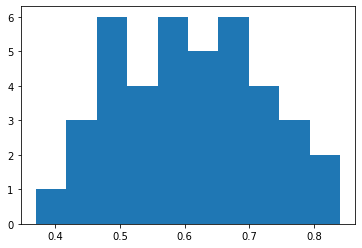

In [8]:
plt.hist(t4t_frac)

In [69]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'PPO_single_t4t/'
exp_dir = 'PPO_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [70]:

t4t_frac = []
coop_frac = []
for test_exp in exps:
    path1 = base_dir+ exp_dir+test_exp
# path1 = base_dir+ exp_dir+run_dir

# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t'
# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
    
    if os.path.exists(path1 + cp_path):
        with open(path1 + '/params.pkl', 'rb') as f:
            data = pickle.load(f)
        agent = PPOTrainer(config=data)
        agent.restore(path1+ cp_path, )
        t_frac, c_frac = evaluation.is_t4t(agent,100)
        t4t_frac.append(t_frac[0])
        coop_frac.append(c_frac)

2021-08-16 20:28:12,175	INFO trainable.py:106 -- Trainable.setup took 11.679 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-08-16 20:28:12,184	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:28:12,334	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00011_11_gamma=0.99,lr=5e-05_2021-08-14_10-03-08/checkpoint_000100/checkpoint-100
2021-08-16 20:28:12,335	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37253.41027712822, '_episodes_total': 4000}
2021-08-16 20:28:25,297	INFO trainable.py:106 -- Trainable.setup took 12.109 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2021-08-16 20:28:25,322	WARNING util.py:55 -- Install gputil

2021-08-16 20:30:01,754	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 37495.59412121773, '_episodes_total': 4000}
2021-08-16 20:30:08,982	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:30:09,176	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env_65543_00015_15_gamma=0.999,lr=1e-05_2021-08-14_20-27-02/checkpoint_000100/checkpoint-100
2021-08-16 20:30:09,204	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 100, '_timesteps_total': None, '_time_total': 36689.12459254265, '_episodes_total': 4000}
2021-08-16 20:30:16,606	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-16 20:30:16,716	INFO trainable.py:382 -- Restored on 192.168.1.21 from checkpoint: /home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/PPO_single_t4td/PPO_MG_t4td_env

In [119]:
lr_options  = sorted(data1['lr'].unique())
gamma_options = sorted(data1['gamma'].unique())

ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan

for ii in range(len(data1)):
    lr_i = lr_options.index(data1.loc[ii].lr)
    
    gamma_i = gamma_options.index(data1.loc[ii].gamma)
        
    ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

In [121]:
plt.pcolor(ep_mean_arr)

Figure(432x288)


2021-08-17 00:05:06,403	WARNING worker.py:1189 -- The autoscaler failed with the following error:
Traceback (most recent call last):
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 317, in run
    self._run()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 207, in _run
    self.update_load_metrics()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 169, in update_load_metrics
    response = self.gcs_node_resources_stub.GetAllResourceUsage(
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 826, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 729, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status 

In [68]:
t4t_frac

[0.46,
 0.51,
 0.46,
 0.56,
 0.49,
 0.49,
 0.57,
 0.46,
 0.52,
 0.48,
 0.43,
 0.49,
 0.42,
 0.54,
 0.55,
 0.54,
 0.51,
 0.53,
 0.52,
 0.52]

In [67]:
coop_frac

[0.7,
 1.0,
 1.0,
 0.8,
 0.56,
 1.0,
 0.6599999999999999,
 1.0,
 0.72,
 0.71,
 0.7,
 0.52,
 0.33999999999999997,
 0.56,
 1.0,
 0.74,
 0.5700000000000001,
 0.6599999999999999,
 0.76,
 0.54]

In [54]:
len(t4t_frac)

20

In [56]:

plt.plot(t4t_frac)
plt.show()

Figure(432x288)
